# TD Bank - Stock Prices Prediction

## 1. Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_datareader as webreader
import pandas as pd
import tensorflow as tf
import seaborn as sns
import datetime as dt
import pandas_datareader as webreader
from datetime import date, timedelta, datetime

## 2. Load Data

In [4]:
# Import dataset
df = pd.read_csv('TDBank_StockPrices_2016-2021.csv')

# today = date.today()
# date_today = today.strftime("%Y-%m-%d")
# date_start = '2016-01-01'

# # Read stock quotes from Yahoo Finance
# df = webreader.DataReader('CM-PQ', data_source='yahoo', start=date_start, end=date_today)

# Input data of np array - Closing price
dataset = df.iloc[:, 4:5].values

print(dataset.shape)

(1254, 1)


In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-13,57.650002,57.730000,57.049999,57.330002,47.064384,2662700
1,2016-09-14,57.299999,57.389999,56.930000,56.990002,46.785259,1992600
2,2016-09-15,57.090000,57.610001,57.000000,57.549999,47.244987,2299300
3,2016-09-16,57.549999,57.660000,56.950001,57.180000,46.941238,7597200
4,2016-09-19,57.380001,57.700001,57.060001,57.279999,47.023342,2203000
...,...,...,...,...,...,...,...
1249,2021-09-03,82.559998,82.620003,82.099998,82.449997,82.449997,2337600
1250,2021-09-07,83.000000,83.599998,82.750000,83.029999,83.029999,3212900
1251,2021-09-08,83.120003,83.349998,82.449997,82.519997,82.519997,2588300
1252,2021-09-09,82.349998,82.800003,82.250000,82.489998,82.489998,2093800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1254 non-null   object 
 1   Open       1254 non-null   float64
 2   High       1254 non-null   float64
 3   Low        1254 non-null   float64
 4   Close      1254 non-null   float64
 5   Adj Close  1254 non-null   float64
 6   Volume     1254 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.7+ KB


In [7]:
# Check for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imputer.fit_transform(dataset)
# dataset = imputer.transform(dataset)
# df.dropna(inplace=True)

## 3. Visualize Data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74bad63850>,
      dtype=object)

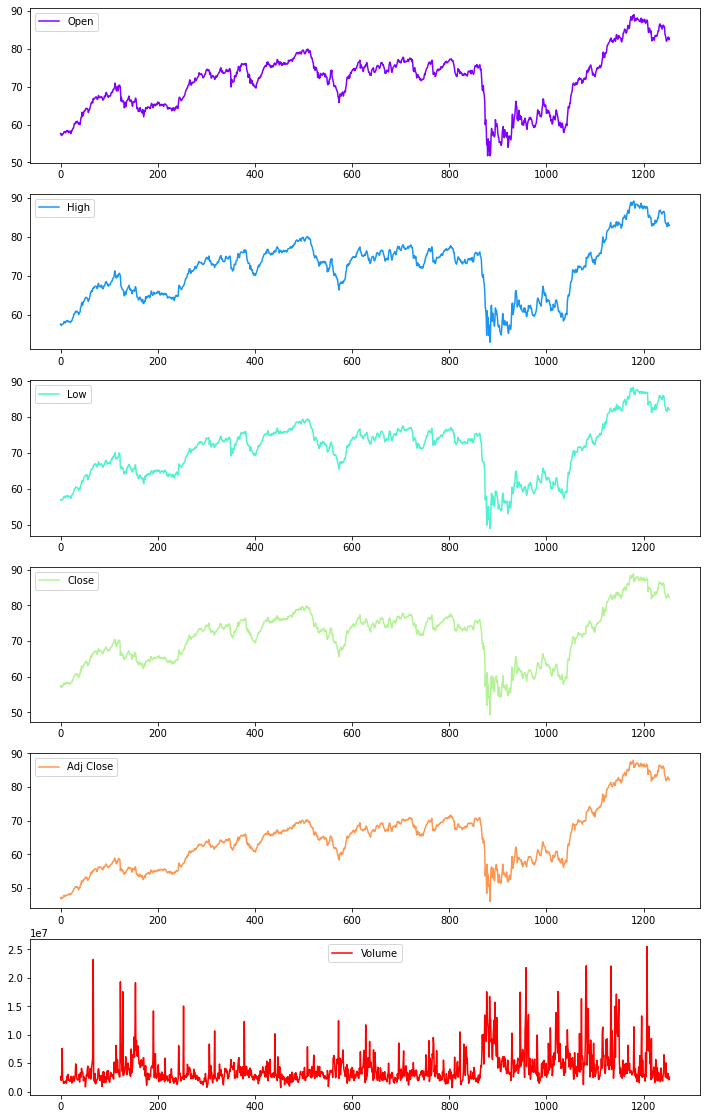

In [9]:
# Plot each data column
df.plot(subplots=True, figsize=(12,20), sharex=False, cmap='rainbow')

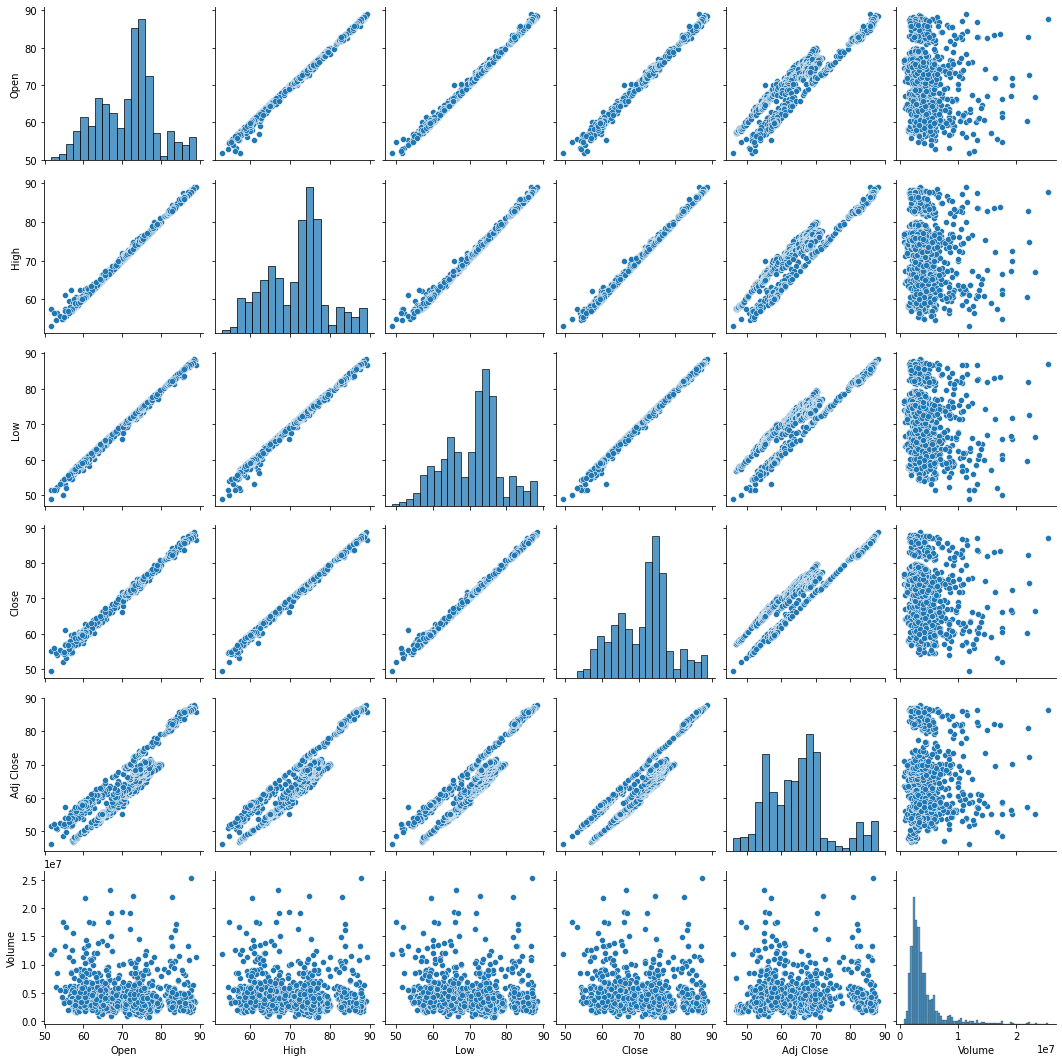

In [10]:
# Pariwise relationship between features
sns.pairplot(df)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

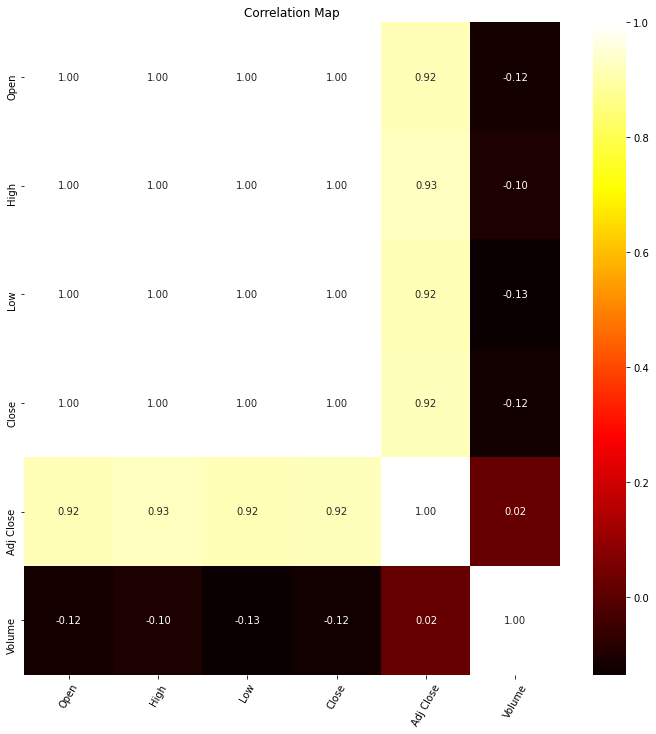

In [11]:
# Correlation Map
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='hot', fmt='.2f')
plt.title('Correlation Map')
plt.xticks(rotation=60)

## 4. Data Preprocessing and Feature Engineering

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Normalize data
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(dataset)

In [14]:
dataset_scaled

array([[0.20364288],
       [0.19504182],
       [0.2092082 ],
       ...,
       [0.84088031],
       [0.84012142],
       [0.8327852 ]])

In [15]:
# Split dataset into training set and test set (80/20 split)
training_size = int(len(df)*0.8)
dataset_train = dataset_scaled[:training_size]
dataset_test = dataset_scaled[training_size:]

print('Training set shape: ' + str(dataset_train.shape))
print('Test set shape: ' + str(dataset_test.shape))

Training set shape: (1003, 1)
Test set shape: (251, 1)


#### Create a data structure with 60 timesteps and 1 output

In [16]:
# Predict stock price results using 60 timesteps (60 business days)
timesteps = 60

def define_training_data(timesteps, dataset):
  ''' 
  Define number of timesteps and features needed for training and 
  validating RNN model 
  '''

  # X - number of timesteps, y - indicators (features) used for training
  X, y = [], []
  for i in range(timesteps, dataset.shape[0]):
    X.append(dataset[i-timesteps:i, 0])
    y.append(dataset[i, 0])
  X, y = np.array(X), np.array(y)
  return X, y

X_train, y_train = define_training_data(timesteps, dataset_train)
print(X_train.shape, y_train.shape)

(943, 60) (943,)


#### Reshaping

In [17]:
# Reshape(number of rows, number of timesteps (columns), number of predictors)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
X_train

array([[[0.20364288],
        [0.19504182],
        [0.2092082 ],
        ...,
        [0.35517332],
        [0.3622565 ],
        [0.3718695 ]],

       [[0.19504182],
        [0.2092082 ],
        [0.19984825],
        ...,
        [0.3622565 ],
        [0.3718695 ],
        [0.38654185]],

       [[0.2092082 ],
        [0.19984825],
        [0.20237795],
        ...,
        [0.3718695 ],
        [0.38654185],
        [0.40197317]],

       ...,

       [[0.29193021],
        [0.33215283],
        [0.31798632],
        ...,
        [0.39615491],
        [0.37667593],
        [0.35770299]],

       [[0.33215283],
        [0.31798632],
        [0.33341767],
        ...,
        [0.37667593],
        [0.35770299],
        [0.34884901]],

       [[0.31798632],
        [0.33341767],
        [0.3202631 ],
        ...,
        [0.35770299],
        [0.34884901],
        [0.36428033]]])

In [19]:
X_train.shape

(943, 60, 1)

## 5. Define LSTM model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Epoch 1/100
30/30 [==============================] - 11s 142ms/step - loss: 0.0359
Epoch 2/100
30/30 [==============================] - 4s 135ms/step - loss: 0.0082
Epoch 3/100
30/30 [==============================] - 4s 134ms/step - loss: 0.0067
Epoch 4/100
30/30 [==============================] - 4s 136ms/step - loss: 0.0069
Epoch 5/100
30/30 [==============================] - 4s 139ms/step - loss: 0.0058
Epoch 6/100
30/30 [==============================] - 4s 135ms/step - loss: 0.0054
Epoch 7/100
30/30 [==============================] - 4s 135ms/step - loss: 0.0048
Epoch 8/100
30/30 [==============================] - 4s 136ms/step - loss: 0.0048
Epoch 9/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0045
Epoch 10/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0043
Epoch 11/100
30/30 [==============================] - 4s 134ms/step - loss: 0.0041
Epoch 12/100
30/30 [==============================] - 4s 130ms/step - loss: 0.0041
Epoch 13/100

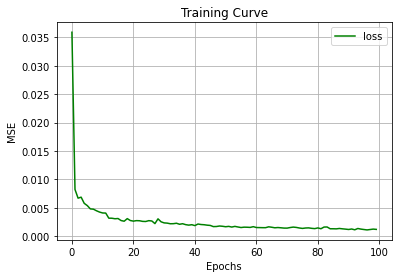

In [21]:
# Define model
reg = Sequential()

# LSTM layers
reg.add(LSTM(units=60, return_sequences=True, 
             input_shape=(X_train.shape[1], X_train.shape[2])))
reg.add(Dropout(0.1))
reg.add(LSTM(units=60, return_sequences=True))
reg.add(Dropout(0.1))
reg.add(LSTM(units=60, return_sequences=True))
reg.add(Dropout(0.1))
reg.add(LSTM(units=60, return_sequences=False))
reg.add(Dropout(0.1))

# Output layer
reg.add(Dense(units=X_train.shape[2]))

# Compile model
# The Adam optimizer is always a safe choice for any DNN model
# Alternatively, use RMSprop
reg.compile(optimizer='adam', loss='mean_squared_error')

# Train (fit) model
history = reg.fit(X_train, y_train, batch_size=32, epochs=100)

# Plot loss during training
plt.plot(history.history['loss'], 'g', label='loss')
plt.title('Training Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

## 6. Evalutate model

#### Make predictions

In [22]:
# Get 60 previous stock prices for predicting
inputs = dataset[len(dataset)-len(dataset_test) - timesteps:]
# Reshape input values
inputs = inputs.reshape(-1, 1)
# Scale input values, directly apply transformations (already fitted)
inputs = sc.transform(inputs)

# Define test set structure
X_test = []
# For the entire test set
for i in range(timesteps, timesteps + len(dataset_test)):
  # Range of values from i-60 to i, first column
  X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

# Obtain 3D structure of the test set
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Predict the test set results
predicted_stock_price = reg.predict(X_test)
# Apply inverse transformations
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(dataset_test)

# Print predicted and real stock prices side-by-side
print(np.concatenate((predicted_stock_price.reshape(len(predicted_stock_price), 1), 
                      real_stock_price.reshape(len(real_stock_price), 1)), 1 ))

# Print Scores
print('')
print('--- Prediction Scores ---')
print('')
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: ' + str(mae))
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: ' + str(mse))
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+ str(rmse))
r2 = r2_score(real_stock_price, predicted_stock_price)
print('R^2 Score: '+ str(r2))

[[63.46598816 63.310001  ]
 [63.41676331 63.380001  ]
 [63.45933533 63.209999  ]
 [63.48465729 62.560001  ]
 [63.31871414 62.529999  ]
 [63.08191299 62.080002  ]
 [62.78313446 60.799999  ]
 [62.22826767 60.919998  ]
 [61.69235229 60.169998  ]
 [61.16950226 60.84      ]
 [60.91975403 61.32      ]
 [61.01065445 62.369999  ]
 [61.48644257 61.57      ]
 [61.87125015 61.650002  ]
 [62.06424332 61.790001  ]
 [62.14677048 62.5       ]
 [62.3278389  63.48      ]
 [62.76369476 63.279999  ]
 [63.19367218 63.41      ]
 [63.50550079 62.709999  ]
 [63.51567078 61.540001  ]
 [63.09456253 60.48      ]
 [62.32134628 60.029999  ]
 [61.47539139 60.560001  ]
 [60.94141006 60.419998  ]
 [60.70734024 59.349998  ]
 [60.43791962 59.240002  ]
 [60.13146591 59.16      ]
 [59.86431885 60.02      ]
 [59.85669708 60.529999  ]
 [60.12162018 59.77      ]
 [60.31629181 58.740002  ]
 [60.17456055 57.82      ]
 [59.68382645 58.799999  ]
 [59.29419708 58.779999  ]
 [59.11726379 59.02      ]
 [59.14011383 59.950001  ]
 

#### Visualizing results

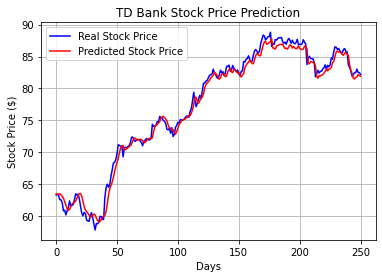

In [23]:
# Plot predicted and real closing stock prices
plt.plot(real_stock_price, color = 'blue', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.title('TD Bank Stock Price Prediction')
plt.legend()
plt.grid()
plt.show()